# BAB PERKENALAN

Nama : Praduta Firman
FTDS : Batch-002

Sumber Dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud

Dataset : Dataset berisikan mengenai transaksi kartu kredit yang dilakukan pada bulan September 2013 oleh pemegang kartu kredit Eropa.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

# IMPORT PUSTAKA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.mixture import BayesianGaussianMixture

# DATA LOADING

In [2]:
df =pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# DATA CLEANING

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Tidak terdapat missing values

# EKSPLORASI DATA

In [9]:
num_dat=df[df.describe().columns.values]
cat_dat=df.drop(columns=df.describe().columns.values)

In [10]:
num_dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


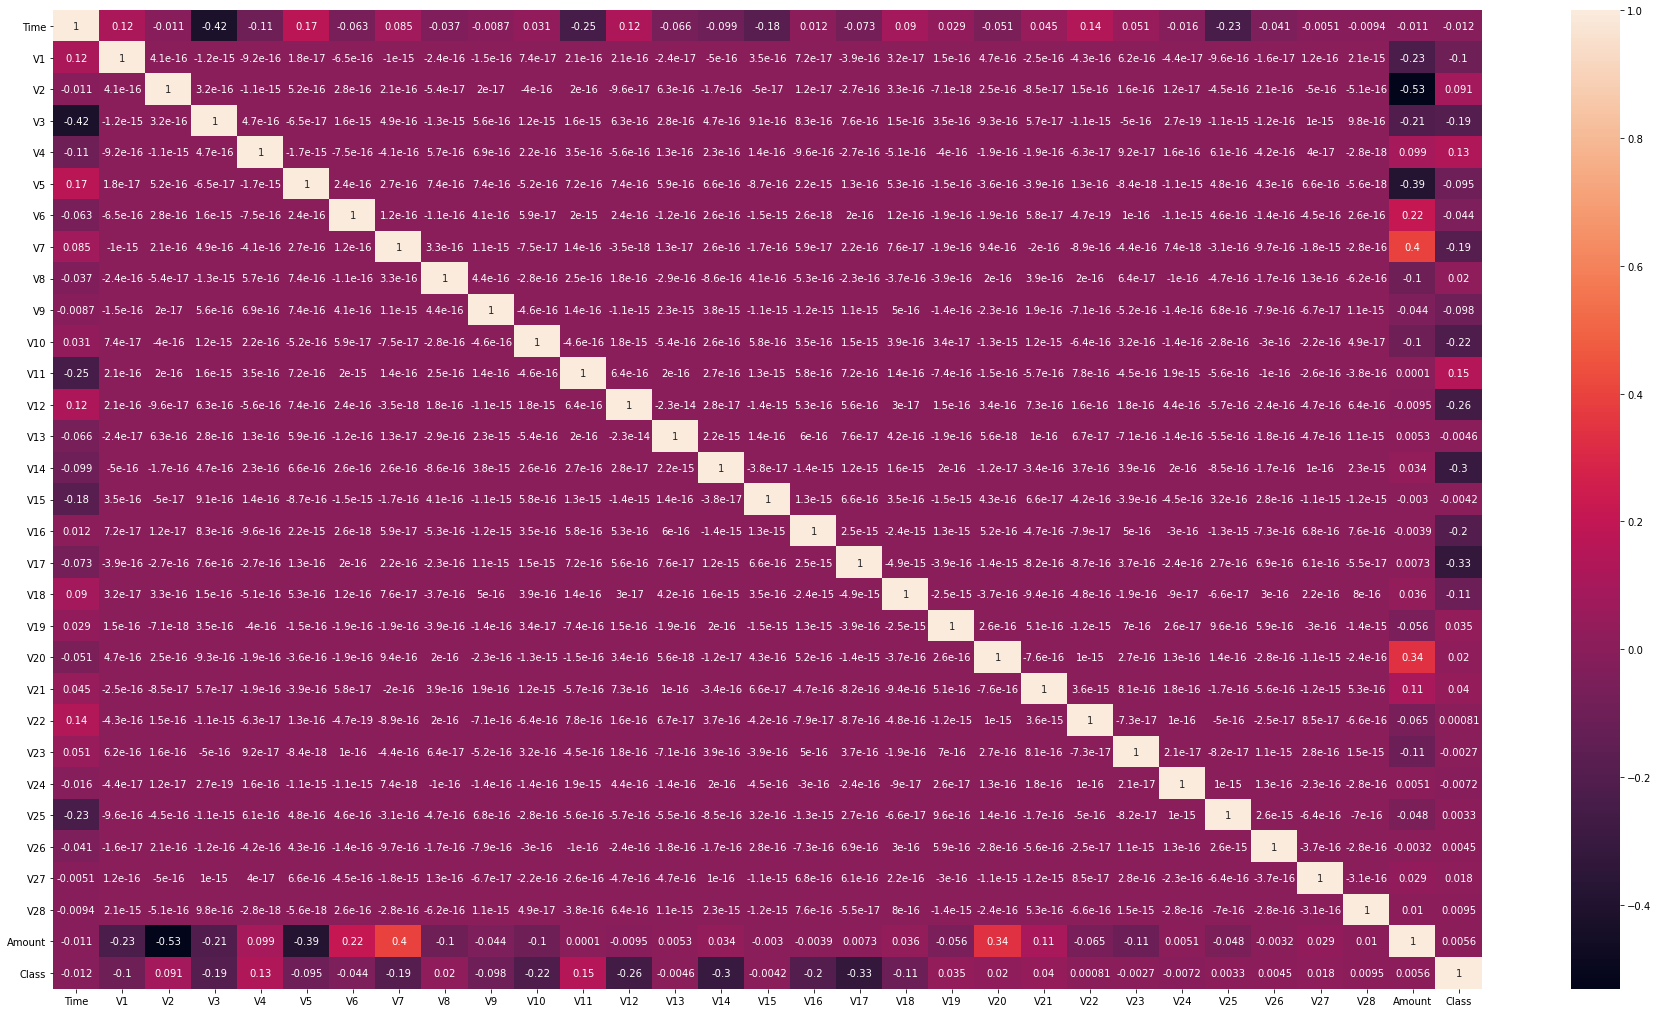

In [11]:
plt.figure(figsize=(32,18))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:>

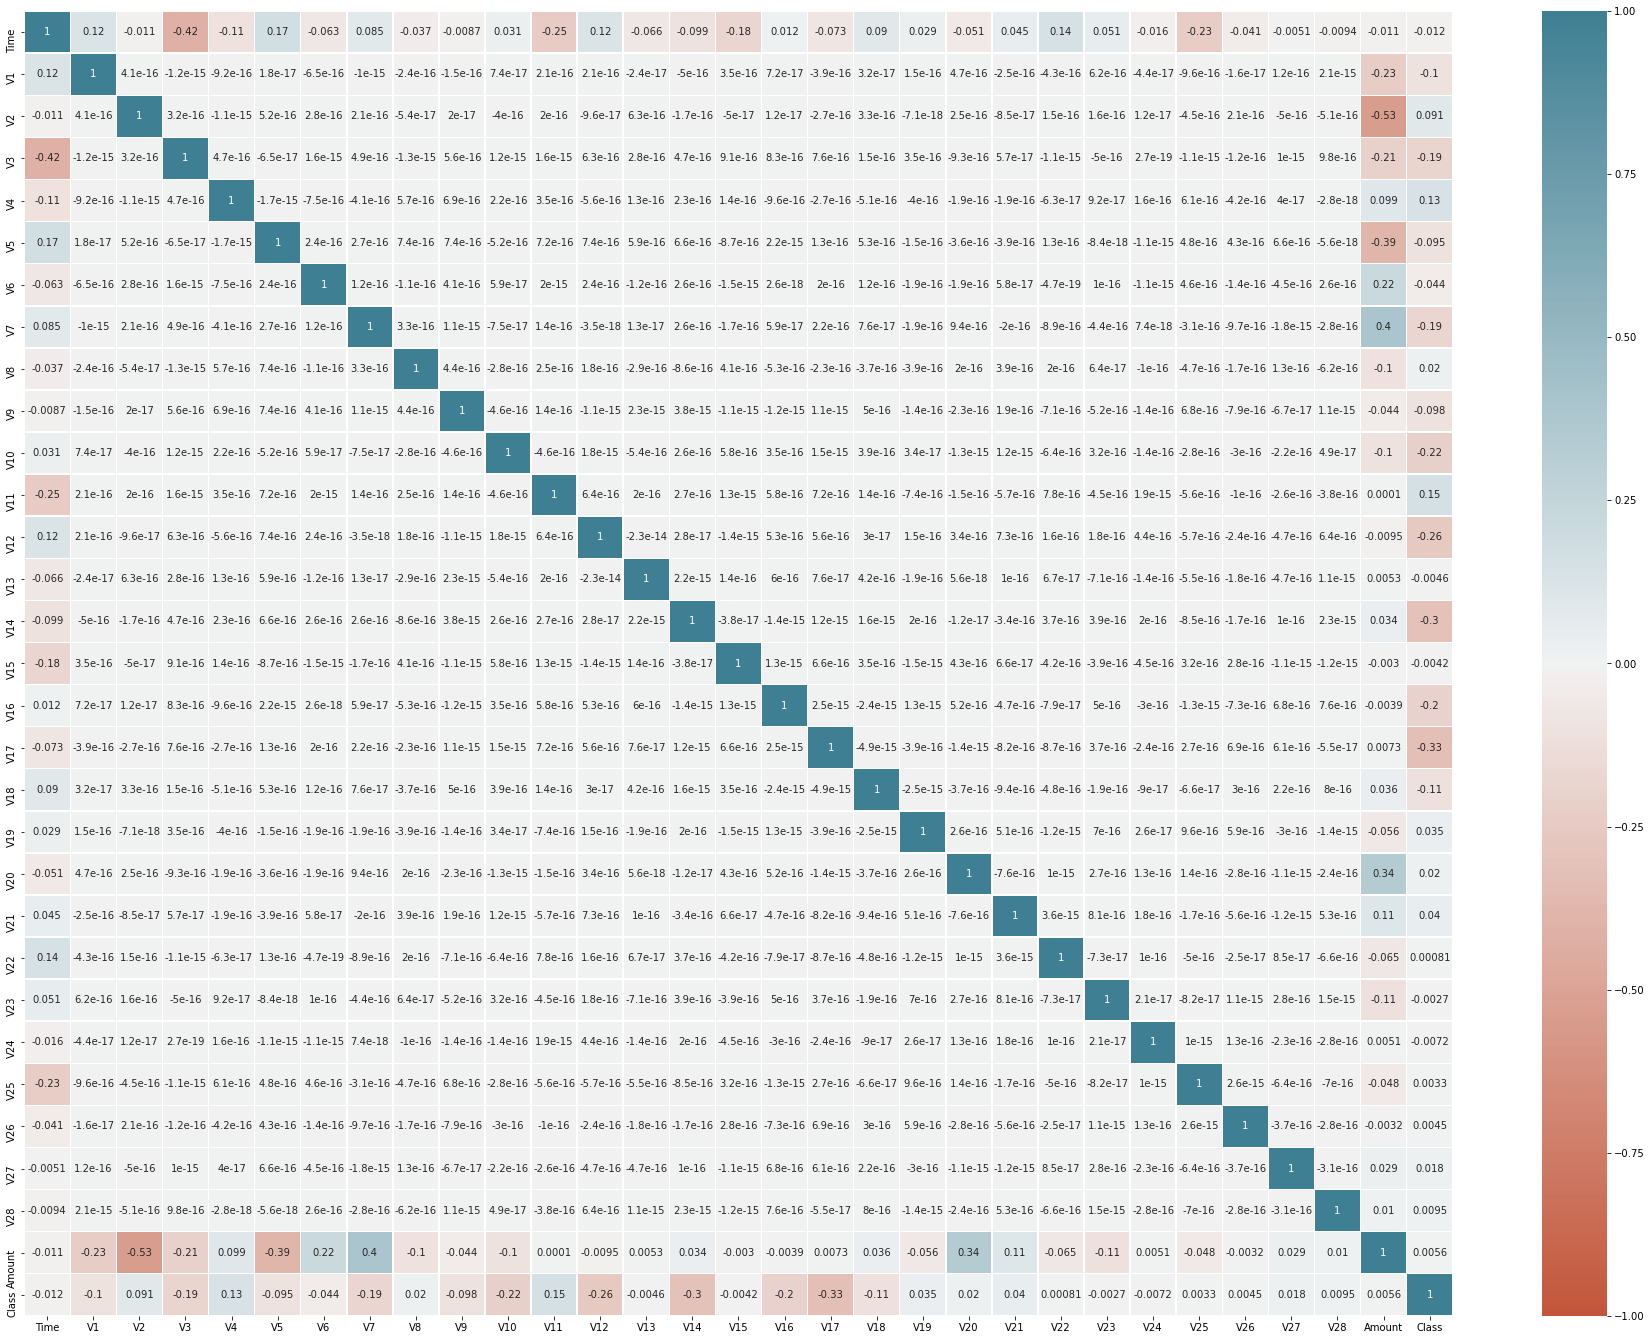

In [12]:
plt.figure(figsize=(32,24))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

In [13]:
not_v = ['Time', 'Amount','Class']

V_feat = df.drop(not_v, axis=1)
V_feat.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [14]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

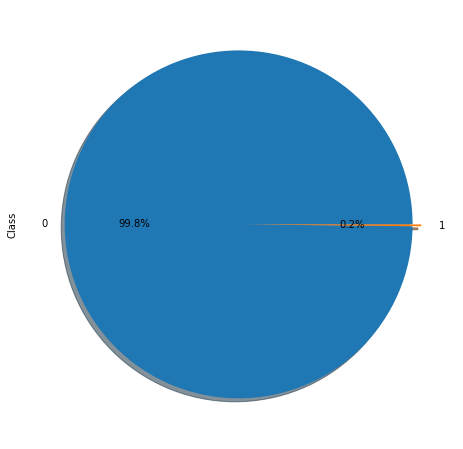

In [15]:
plt.figure(figsize=(8,8))
df['Class'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

Visualisasi tersebut memperlihatkan bahwa pengguna kartu kredit terdapat 492 konsumen yang terkena fraud (0,2%)

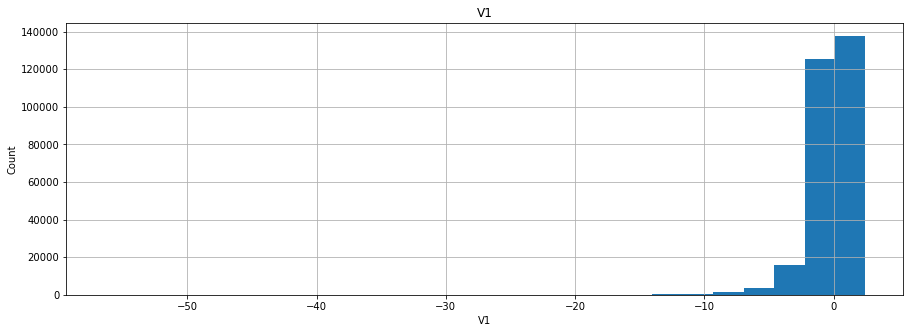

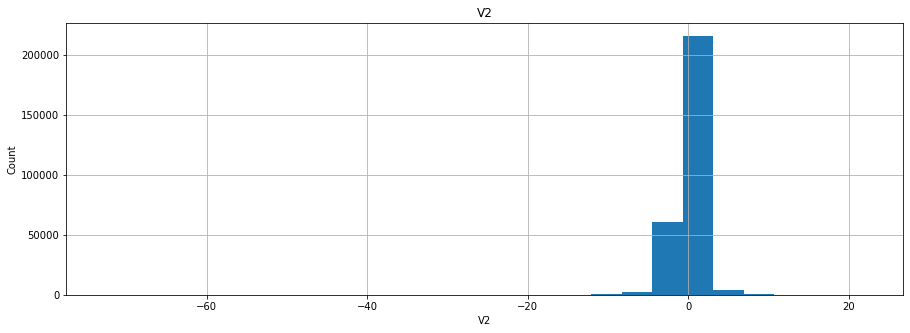

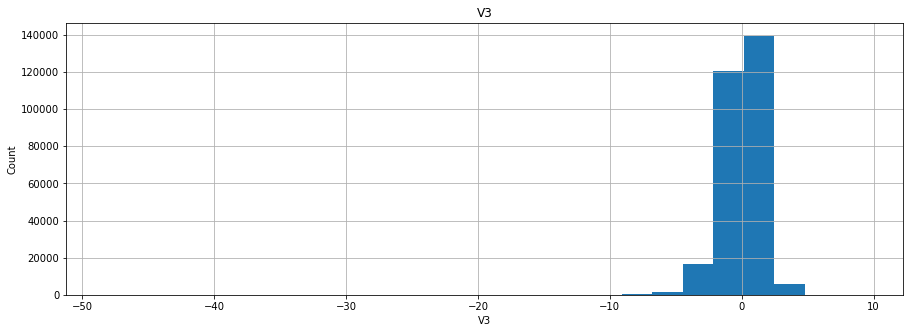

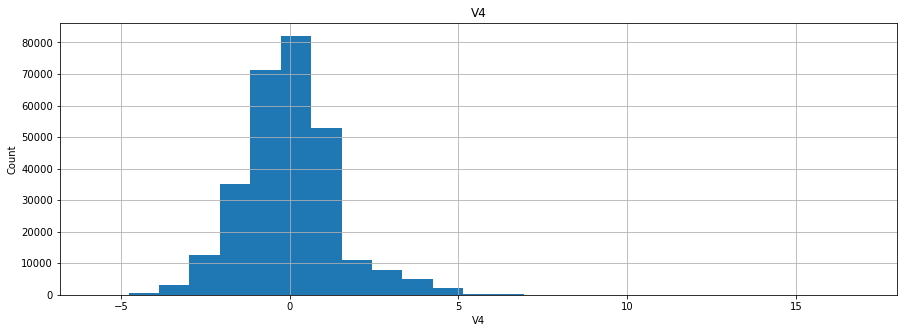

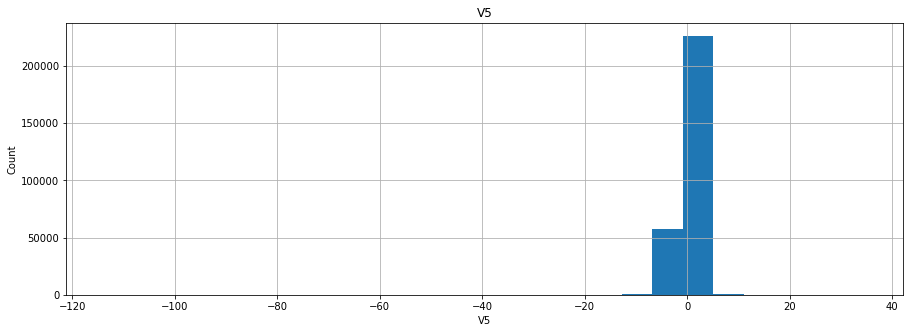

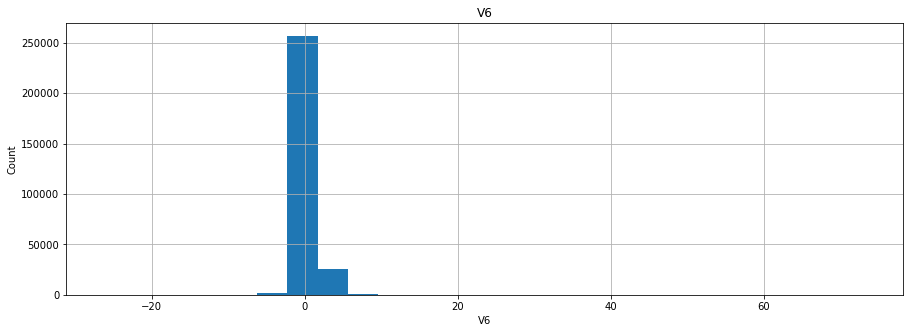

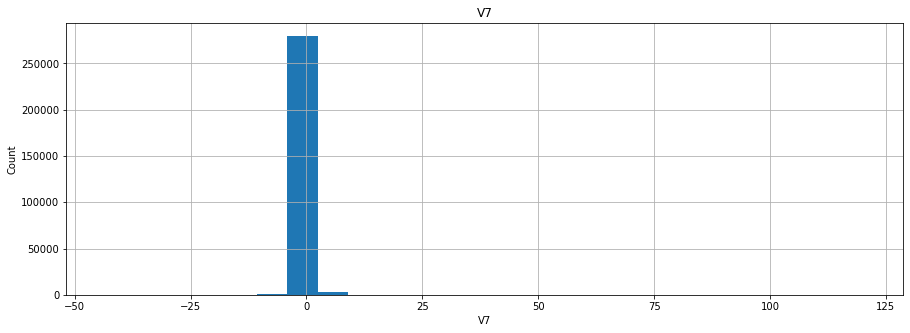

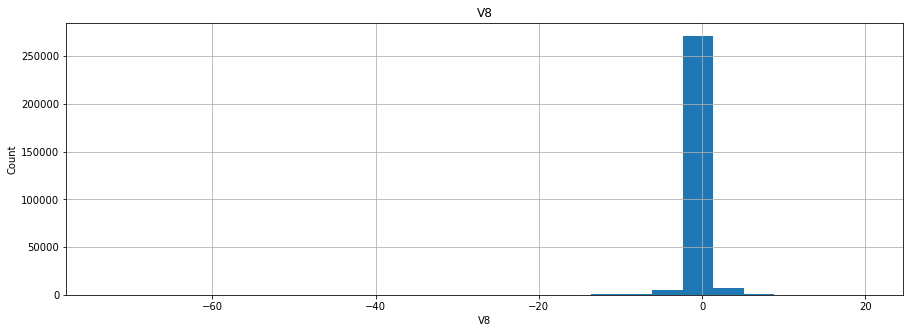

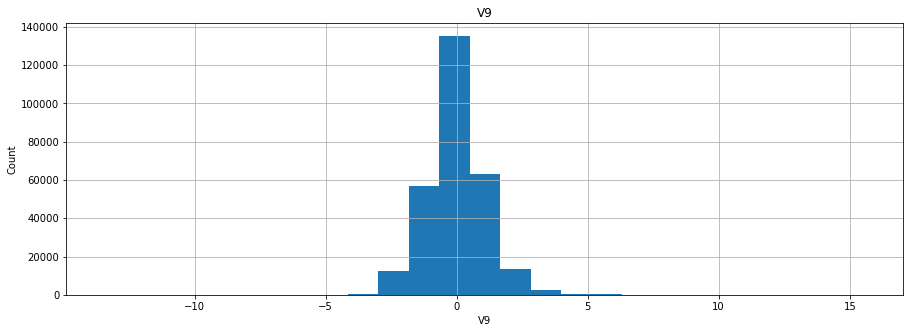

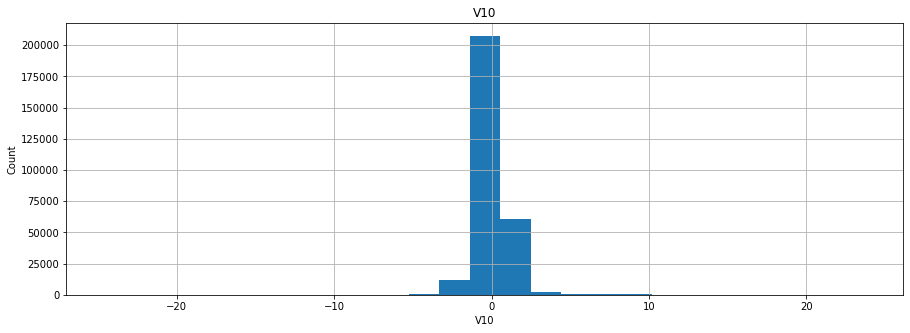

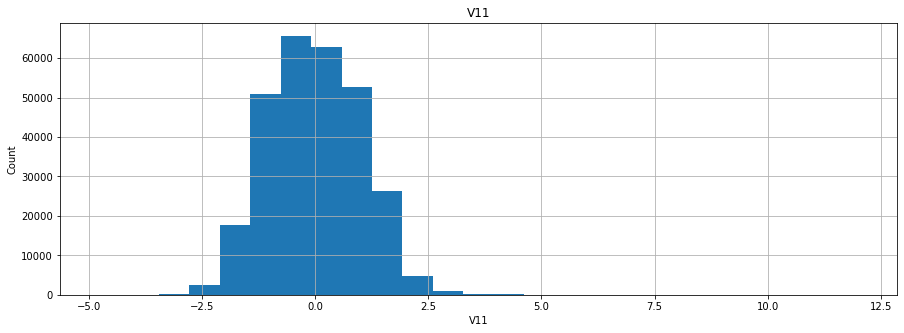

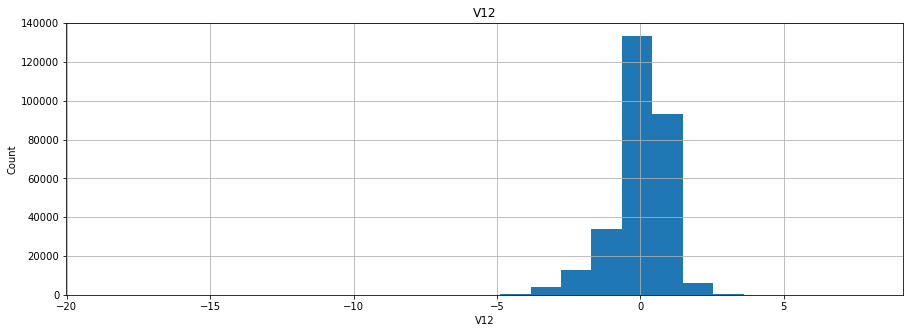

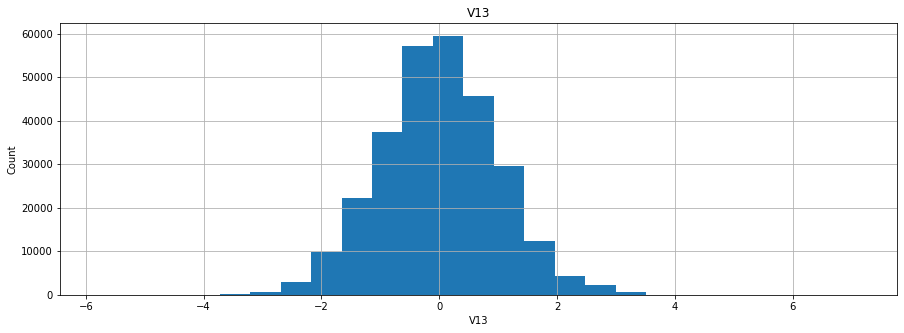

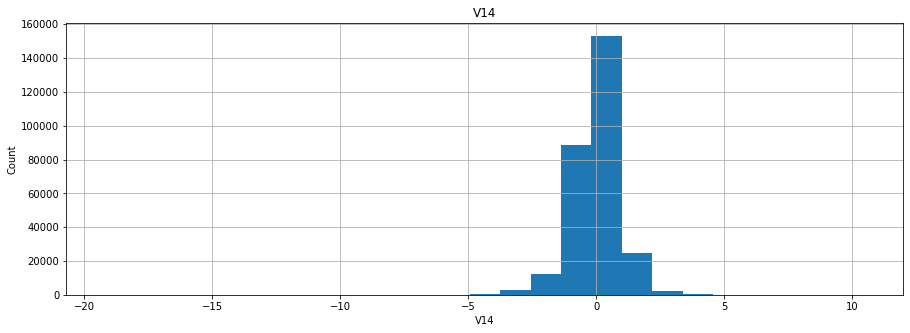

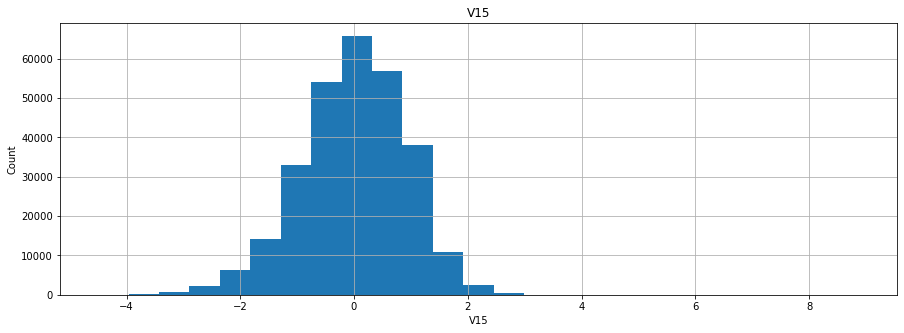

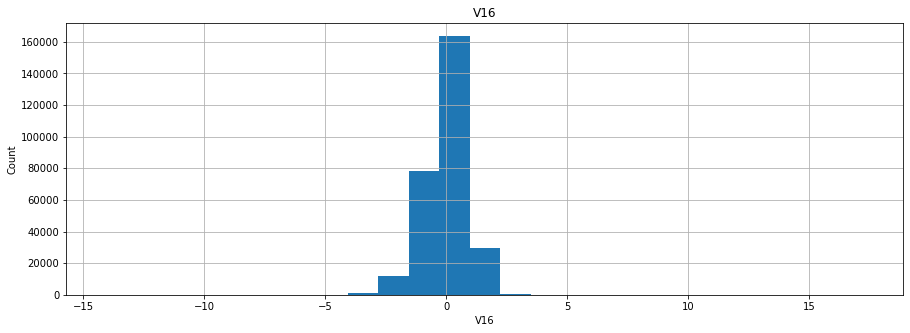

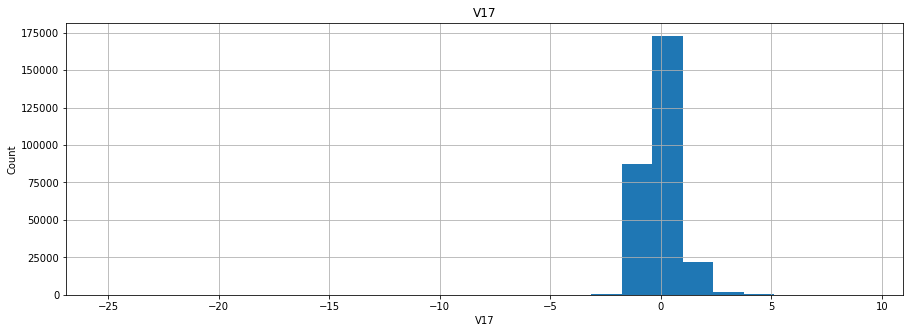

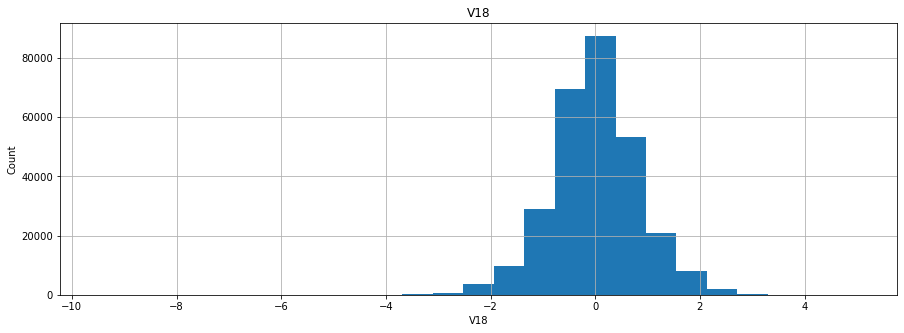

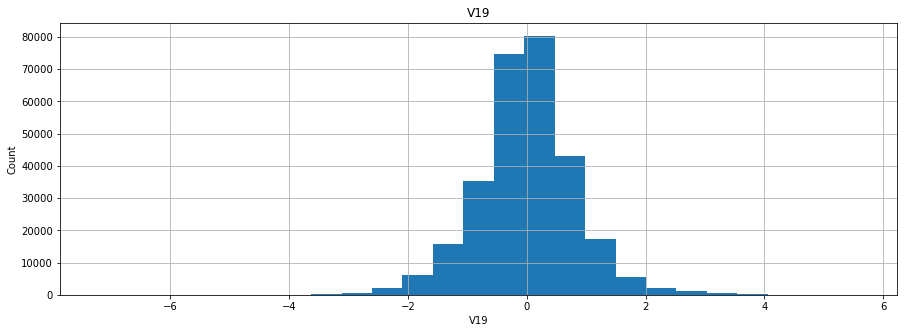

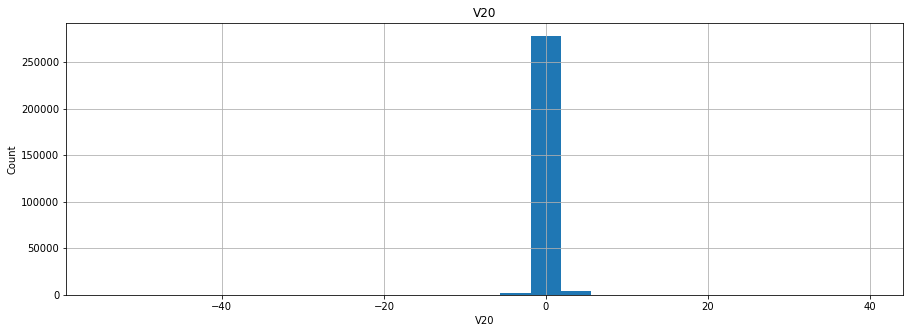

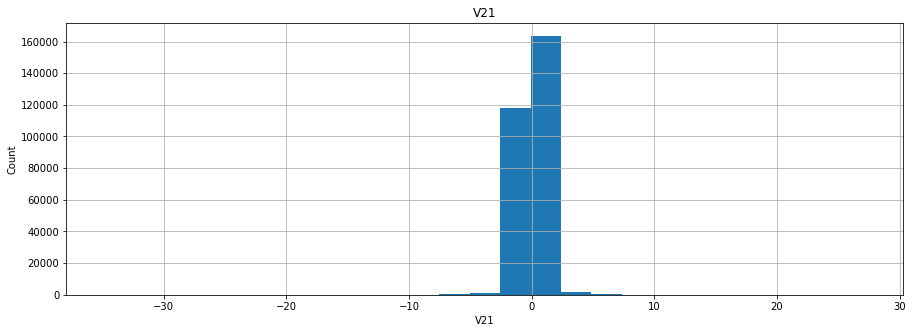

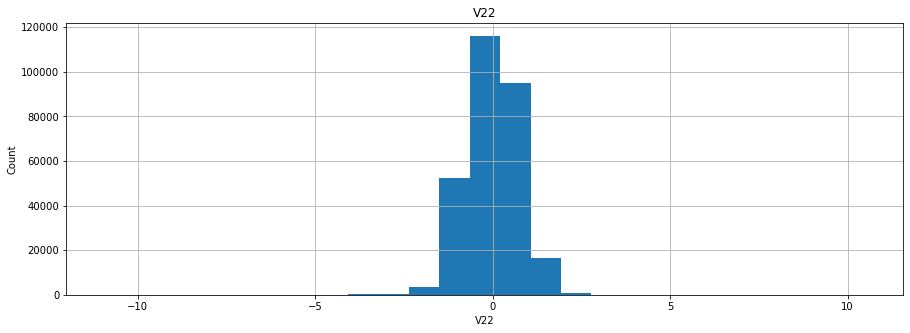

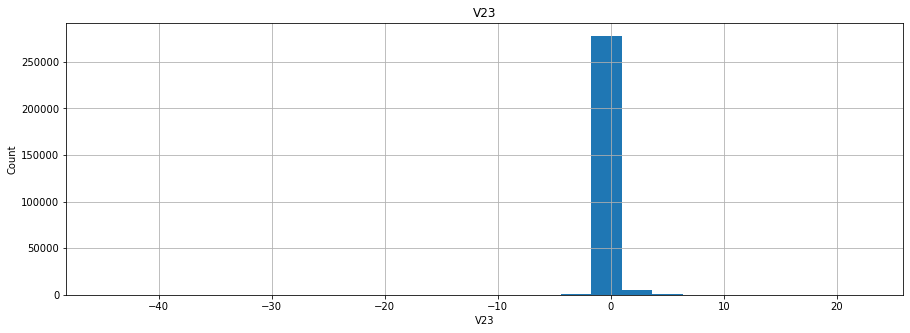

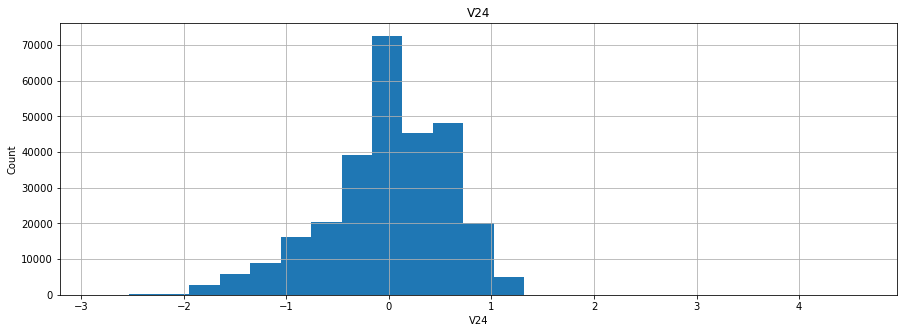

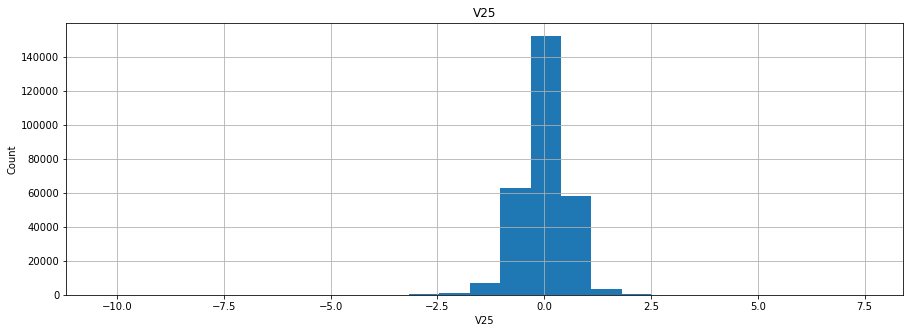

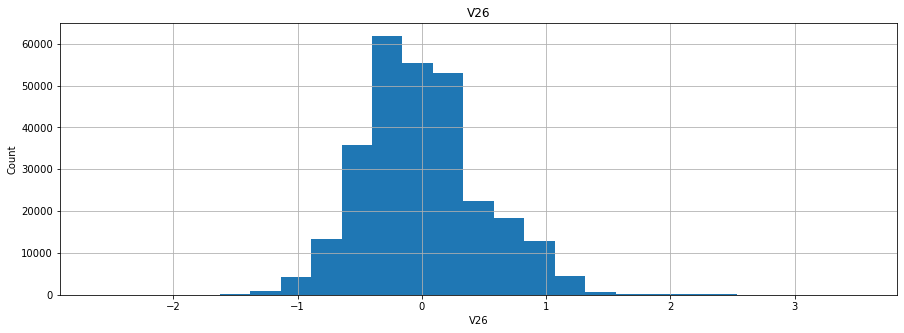

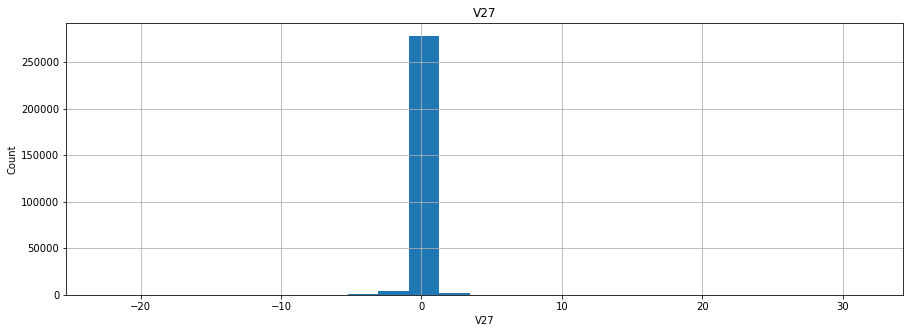

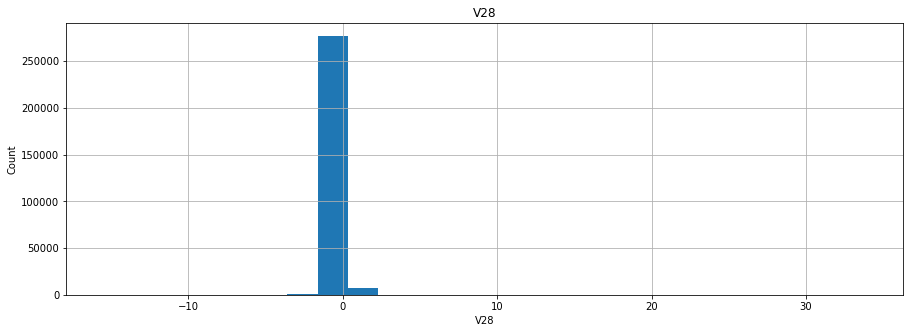

In [16]:
for feature in V_feat:
    dataset = df.copy()
    dataset[feature].hist(bins=25, figsize=(15,5))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# EDA Analysis

dari hasil visualisasi data diperoleh informasi sebagai berikut:

- Pada visualisasi tersebut kita lihat bahwa transaksi konsumen saat in dengan transaksi  sebelumnya dengan rentang waktu 0 - 50.000 detik dan dengan rentang waktu 75.000 sampai 100.00 detik melakukan fraud kartu kredit.

- Pada visualisasi tersebut terlihat bahwa transaksi kartu kredit terdapat fraud dibawah 500.

# DATA PREPROCESSING

In [17]:
col_to_use = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

dataset = df[col_to_use]
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [18]:
X = dataset

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(284807, 30)

In [20]:
scaler=StandardScaler()
num_dat_std=scaler.fit_transform(num_dat)

# PENDEFINISIAN dan PELATIHAN MODEL

mendefinisikan dan melatih model GaussianMixture

In [21]:
model = GaussianMixture(n_components=2)

%time model.fit(X)

Wall time: 31.1 s


GaussianMixture(n_components=2)

# EVALUASI MODEL

In [22]:
labels = model.predict(X)

In [23]:
df['Anomaly'] = labels
df['Anomaly'].value_counts()

1    179443
0    105364
Name: Anomaly, dtype: int64

<AxesSubplot:>

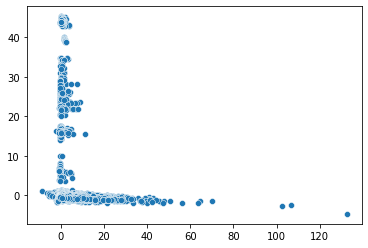

In [24]:
X2D = PCA(n_components=2).fit_transform(num_dat_std)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])

# Anomaly Detection

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

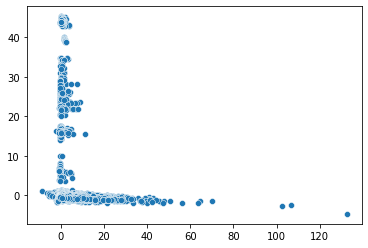

In [25]:
sns.scatterplot(X2D[:,0],X2D[:,1])

<AxesSubplot:>

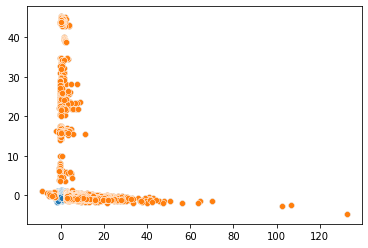

In [26]:
#GaussianMixture

gauss=GaussianMixture().fit(X2D)
scores = gauss.score_samples(X2D)
thresh = np.quantile(scores, 0.03)
index = np.where(scores <= thresh)
outliers = X2D[index]

sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
sns.scatterplot(x=outliers[:,0],y=outliers[:,1])

<AxesSubplot:>

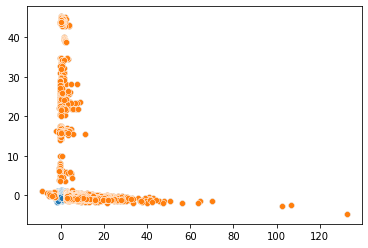

In [27]:
#BayesianGaussianMixture

bgauss=BayesianGaussianMixture().fit(X2D)
scores = bgauss.score_samples(X2D)
thresh = np.quantile(scores, 0.03)
index = np.where(scores <= thresh)
outliers = X2D[index]

sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
sns.scatterplot(x=outliers[:,0],y=outliers[:,1])

# Novelty Detection

<AxesSubplot:>

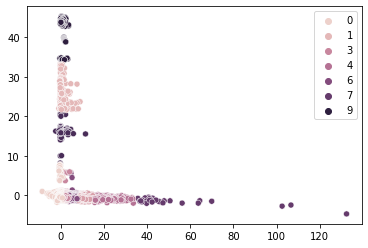

In [28]:
bgm = BayesianGaussianMixture(n_components=10, covariance_type='tied', n_init=10, random_state=42)
bgm.fit(X2D)
label=bgm.predict(X2D)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1],hue=label)

In [29]:
index=np.where(label==1)

<AxesSubplot:>

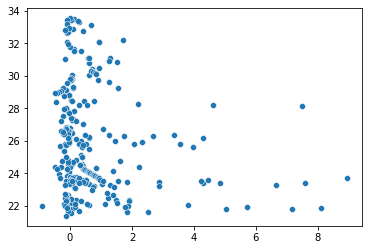

In [30]:
known_data=X2D[index]
sns.scatterplot(x=known_data[:,0],y=known_data[:,1])

In [31]:
#Asumsi data sudah bersih dari outlier
#outlier detection
gauss_novel = GaussianMixture().fit(known_data)
scores_known = gauss_novel.score_samples(known_data)
thresh_known = np.quantile(scores_known, 0.03)
#index_known = np.where(scores_known <= thresh_known)
#values_known = known_data[index_known]
#sns.scatterplot(x=known_data[:,0],y=known_data[:,1])
#sns.scatterplot(x=values_known[:,0],y=values_known[:,1])

<AxesSubplot:>

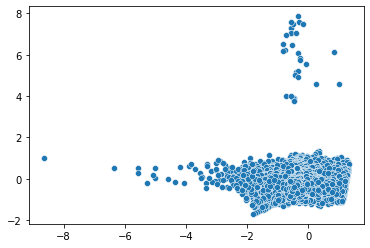

In [32]:
index=np.where(label==0)
new_data=X2D[index]
sns.scatterplot(x=new_data[:,0],y=new_data[:,1])

<AxesSubplot:>

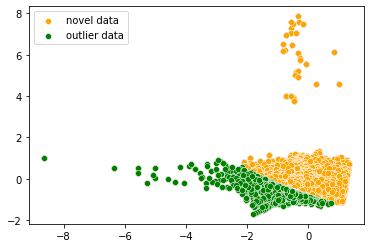

In [33]:
#prediction=gauss_novel.predict(new_data)
scores_new = gauss_novel.score_samples(new_data)

thresh_new = np.quantile(scores_new, 0.03)

index_novel = np.where(scores_new <= thresh_known)
index_out = np.where(scores_new <= thresh_new)

values_new = new_data[index_novel]
values_out = new_data[index_out]

sns.scatterplot(x=new_data[:,0],y=new_data[:,1],color='blue')
sns.scatterplot(x=values_new[:,0],y=values_new[:,1],color='orange',label='novel data')
sns.scatterplot(x=values_out[:,0],y=values_out[:,1],color='green',label='outlier data')

# MODEL INFERENCE

In [34]:
values_1 = [1, 1, 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1]
values_2 = [3, 1, 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 2]
values_3 = [4, 2, 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 3]
values_4 = [5, 2, 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 2 , 4]
values_5 = [7, 3, 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 6]
values_6 = [8, 3, 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 3 , 7]
values_7 = [8, 4, 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 8]
values_8 = [8, 4, 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 4 , 9]
values_9 = [8, 5, 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 11]
values_10 = [8, 5, 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 12]
values_11 = [1, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 12]
values_12 = [4, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 12]
values_13 = [8, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 12]
values_14 = [1, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6]
values_15 = [4, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6]
values_16 = [8, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6]
values_17 = [1, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 1]
values_18 = [4, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 1]
values_19 = [8, 6, 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 6 , 1]

In [35]:
values = [ values_1, values_2, values_3, values_4, values_5, values_6, values_7, values_8, values_9, values_10, values_11, values_12, values_13, values_14, values_15, values_16, values_17, values_18, values_19]


In [36]:
df_dummies = pd.DataFrame(values, columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [37]:
df_dummies

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
2,4,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
3,5,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,4
4,7,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,6
5,8,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,7
6,8,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,8
7,8,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,9
8,8,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,11
9,8,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,12


# MODEL ANALYSIS

In [38]:
values_time = [["0.0 - 0" , "0 - 25000", "25000 - 50000", "50000 - 75000", "75000 - 100000", "100000 - 125000",  "125000 - 150000", "150000 - 175000"]]

time = pd.DataFrame(values_time, columns=["1","2","3", "4" , "5" ,"6","7", "8" ])

values_amount = [["0.0 - 0" , "0 - 25", "25 - 50", "50 - 100", "100 - 200", "200 - 500",  "500 - 1000", "1000 - 2000", "2000 - 5000", "5000 - 10000", "10000 - 20000", "20000 - 30000"]]

amount = pd.DataFrame(values_amount, columns=["1","2","3","4","5","6","7","8","9","10","11","12"])

cons_id = [[ "-200.0 - -100.0", "-100.0 - -50.0" , "-50.0 - -10.0", "-10.0 - -5.0"  , "-5.0 - -3.0" , "-3.0 - -0.0" , "-0.0 - 3.0" , "3.0 - 5.0" , "5.0 - 10.0" , "10.0 - 50.0" , "50.0 - 100.0" , "100.0 - 200.0" ]]

cons = pd.DataFrame(cons_id, columns=["1","2","3","4","5","6","7","8","9","10","11","12"])

In [39]:
print("Jarak transformasi PCA Identitas pengguna V1 - V28: ")
cons

Jarak transformasi PCA Identitas pengguna V1 - V28: 


,1,2,3,4,5,6,7,8,9,10,11,12
0,-200.0 - -100.0,-100.0 - -50.0,-50.0 - -10.0,-10.0 - -5.0,-5.0 - -3.0,-3.0 - -0.0,-0.0 - 3.0,3.0 - 5.0,5.0 - 10.0,10.0 - 50.0,50.0 - 100.0,100.0 - 200.0


In [40]:
print("Jarak rata-rata antar transaksi (Detik):")
time

Jarak rata-rata antar transaksi (Detik):


,1,2,3,4,5,6,7,8
0,0.0 - 0,0 - 25000,25000 - 50000,50000 - 75000,75000 - 100000,100000 - 125000,125000 - 150000,150000 - 175000


In [41]:
print("Jarak Nilai Transaksi:")
amount

Jarak Nilai Transaksi:


,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0 - 0,0 - 25,25 - 50,50 - 100,100 - 200,200 - 500,500 - 1000,1000 - 2000,2000 - 5000,5000 - 10000,10000 - 20000,20000 - 30000


# OVERALL ANALYSIS

dari hasil Anomaly Detection dengan model Gaussian Mixture dapat disimpulkan sebagai berikut:

- Pada transaksi terdapat bahwa konsumen yang melakukan suatu kegiatan yang diluar kebiasaan (type anomali 0) adalah konsumen dengan identitas pengguna V1 - V28 dengan nilai 1 sampai dengan nilai 5 yang memiliki range transformasi PCA antara -200.0 sampai dengan -3.0 dengan memiliki nilai rata-rata transaksi normal (type 1) antara 0 sampai dengan 20.000.

- Kemudian konsumen dengan identitas pengguna V1 - V28 dengan nilai 6 keatas atau memiliki range transformasi PCA 0.0 keatas cenderung melakukan transaksi kartu kredit secara teratur (normal) atau bisa dibilang transaksinya relatif merata (type 1).